## Predicting the Critical Temperature of a Superconductor

### FIT5149 Assessment 1
#### Student Name:Balaji Ippagunta
#### Student ID: 29876451

Date: 10/09/2019

Version: 2.0

Environment: R 3.6.0 and Anaconda 4.3.0 (64-bit)


## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

Libraries used:
* ggplot2
* corrplot 
* reshape2
* tidyverse
* caret
* dplyr
* glmnet
* randomForest

In [1]:
options(warn=-1)
library(reshape2)
library(ggplot2)
library(dplyr) ### for %>%
library(tidyverse)
library(corrplot)
library(caret)
library(glmnet)
install.packages("caTools")
library(caTools)
install.packages("randomForest")
library(randomForest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Loading required package: Matrix

Attaching package: 'Matrix'

The follo

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Balaji\AppData\Local\Temp\Rtmp2xSbEX\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Balaji\AppData\Local\Temp\Rtmp2xSbEX\downloaded_packages


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [2]:
uniqdf <- read.csv('unique_m.csv', header = TRUE)
propertiesdf <- read.csv('train.csv', header = TRUE)

### 1. Introduction <a class="anchor" id="sec_1"></a>

The data set was originally from from the Superconducting Material Database
maintained by Japan’s National Institute for Materials Science(NIMS). It contains 21,263 material records, each of which have 82
columns: 81 columns corresponding to the features extracted and the last 1 column of the observed Tc values. Among those 81 columns, the first column is the
number of elements in the material, the rest 80 columns are features extracted
from 8 properties (each property has 10 features).

### 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [3]:
# Display the dimensions
cat("The housing dataset has", dim(propertiesdf)[1], "records, each with", dim(propertiesdf)[2],
    "attributes. The structure is:\n\n")

# Display the structure
str(propertiesdf)

cat("\nThe first few and last few records in the dataset are:")
# Inspect the first few records
head(propertiesdf)
# And the last few
tail(propertiesdf)

cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(propertiesdf)

cat("The numbers of unique values for each attribute are:")
apply(propertiesdf, 2, function(x) length(unique(x)))

The housing dataset has 21263 records, each with 82 attributes. The structure is:

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 101

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,3,89.38983,89.38983,63.69471,63.69471,0.7825737,0.7825737,164.13150,54.710500,73.15689,...,4.666667,4.578857,4.578857,1.0789922,1.0789922,2,0.6666667,0.9428090,0.9428090,3.43
21259,4,106.95788,53.09577,82.51538,43.13556,1.1771448,1.2541187,146.88130,15.504479,65.76408,...,3.555556,3.223710,3.519911,1.3778195,0.9136580,1,2.1688889,0.4330127,0.4969040,2.44
21260,5,92.26674,49.02137,64.81266,32.86775,1.3232866,1.5716301,188.38390,7.353333,69.23266,...,2.047619,2.168944,2.038991,1.5941667,1.3372458,1,0.9047619,0.4000000,0.2129589,122.10
21261,2,99.66319,95.60910,99.43388,95.46432,0.6908472,0.5301975,13.51362,53.041104,6.75681,...,4.800000,4.472136,4.781762,0.6869616,0.4505612,1,3.2000000,0.5000000,0.4000000,1.98
21262,2,99.66319,97.09560,99.43388,96.90108,0.6908472,0.6408830,13.51362,31.115202,6.75681,...,4.690000,4.472136,4.665819,0.6869616,0.5776012,1,2.2100000,0.5000000,0.4624932,1.84
21263,3,87.46833,86.85850,82.55576,80.45872,1.0412701,0.8952292,71.75500,43.144000,29.90528,...,4.500000,4.762203,4.242641,1.0549202,0.9701158,3,1.8000000,1.4142136,1.5000000,12.80



Basic statistics for each attribute are:

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

The numbers of unique values for each attribute are:

number_of_elements                mean_atomic_mass 
                              9                            3365 
           wtd_mean_atomic_mass               gmean_atomic_mass 
                          15164                            3365 
          wtd_gmean_atomic_mass             entropy_atomic_mass 
                          15165                            3314 
        wtd_entropy_atomic_mass               range_atomic_mass 
                          15113                            1042 
          wtd_range_atomic_mass                 std_atomic_mass 
                          12641                            3313 
            wtd_std_atomic_mass                        mean_fie 
                          15031                            2997 
                   wtd_mean_fie                       gmean_fie 
                          14940                            3286 
                  wtd_gmean_fie                     entropy_fie 
                          15089                            3238 
                wtd_entropy_fie                       range_fie 
                          15058                             854 
                  wtd_range_fie                         std_fie 
                          12266                            3185 
                    wtd_std_fie              mean_atomic_radius 
                          14922                             942 
         wtd_mean_atomic_radius             gmean_atomic_radius 
                          12423                            3148 
        wtd_gmean_atomic_radius           entropy_atomic_radius 
                          14969                            3111 
      wtd_entropy_atomic_radius             range_atomic_radius 
                          14948                             195 
        wtd_range_atomic_radius               std_atomic_radius 
                          11407                            2529 
          wtd_std_atomic_radius                    mean_Density 
                          14312                            3274 
               wtd_mean_Density                   gmean_Density 
                          15010                            3332 
              wtd_gmean_Density                 entropy_Density 
                          15085                            3283 
            wtd_entropy_Density                   range_Density 
                          15087                             890 
              wtd_range_Density                     std_Density 
                           9279                            3265 
                wtd_std_Density           mean_ElectronAffinity 
                          14939                            2377 
      wtd_mean_ElectronAffinity          gmean_ElectronAffinity 
                          13526                            2678 
     wtd_gmean_ElectronAffinity        entropy_ElectronAffinity 
                          13752                            2635 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                          14078                             644 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                          10937                            2562 
       wtd_std_ElectronAffinity                 mean_FusionHeat 
                          13581                            2660 
            wtd_mean_FusionHeat                gmean_FusionHeat 
                          14194                            3166 
           wtd_gmean_FusionHeat              entropy_FusionHeat 
                          14767                            3108 
         wtd_entropy_FusionHeat                range_FusionHeat 
                          14885                             595 
           wtd_range_FusionHeat                  std_FusionHeat 
                           9671                            2920 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                          14470                 

In [4]:
anyNA(propertiesdf)

[1] FALSE

#### Summary of Attributes

All of the attributes are numerical and there are continuous and discrete atributes.
There are no NA values in our dataset.

### Investigate Distribution of Each Variable

In [5]:
attach(propertiesdf)

#### Feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

In [6]:
propertiesdfnorm <- as.data.frame(lapply(propertiesdf,  function(x) (x - min(x))/(max(x)-min(x))))
propertiesdfnorm

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0.375,0.4058786,0.2539495,0.2997205,0.1649881,0.5957238,0.5425359,0.5909728,0.15465215,0.5144425,...,0.2095238,0.2022273,0.2032972,0.6390970,0.5468533,0.1666667,0.1552751,0.1443376,0.14568627,0.15675580
0.500,0.4246113,0.2571868,0.3329680,0.1663406,0.7305732,0.5401661,0.5909728,0.17589355,0.4661926,...,0.2095238,0.1480292,0.2017799,0.7269560,0.5371086,0.3333333,0.1614043,0.2108185,0.15620209,0.14053956
0.375,0.4058786,0.2540608,0.2997205,0.1650166,0.5957238,0.4984061,0.5909728,0.17384656,0.5144425,...,0.2119048,0.2022273,0.2054464,0.6390970,0.5278526,0.1666667,0.1593612,0.1443376,0.14823221,0.10270168
0.375,0.4058786,0.2540052,0.2997205,0.1650023,0.5957238,0.5220555,0.5909728,0.16424935,0.5144425,...,0.2107143,0.2022273,0.2043703,0.6390970,0.5379358,0.1666667,0.1573182,0.1443376,0.14698404,0.11891792
0.375,0.4058786,0.2538382,0.2997205,0.1649596,0.5957238,0.5766632,0.5909728,0.13545773,0.5144425,...,0.2071429,0.2022273,0.2011605,0.6390970,0.5621533,0.1666667,0.1511889,0.1443376,0.14293649,0.12432333
0.375,0.4058786,0.2536155,0.2997205,0.1649027,0.5957238,0.6256770,0.5909728,0.10062487,0.5144425,...,0.2023810,0.2022273,0.1969239,0.6390970,0.5854497,0.1666667,0.1430165,0.1443376,0.13677530,0.12432333
0.375,0.4058786,0.2530589,0.2997205,0.1647604,0.5957238,0.6724820,0.5909728,0.05236463,0.5144425,...,0.1904762,0.2022273,0.1865447,0.6390970,0.6126221,0.1666667,0.1225856,0.1443376,0.11664237,0.05945839
0.375,0.3443720,0.2505552,0.2650966,0.1639001,0.6035259,0.4818501,0.5909728,0.17730053,0.4384240,...,0.2119048,0.2022273,0.2054464,0.6390970,0.5278526,0.1666667,0.1593612,0.1443376,0.14823221,0.17837745
0.375,0.3443720,0.2487467,0.2650966,0.1633304,0.6035259,0.5014187,0.5909728,0.16943030,0.4384240,...,0.2107143,0.2022273,0.2043703,0.6390970,0.5379358,0.1666667,0.1573182,0.1443376,0.14698404,0.19459368
0.375,0.3443720,0.2469382,0.2650966,0.1627626,0.6035259,0.5190959,0.5909728,0.16156007,0.4384240,...,0.2095238,0.2022273,0.2032972,0.6390970,0.5468533,0.1666667,0.1552751,0.1443376,0.14568627,0.16756662


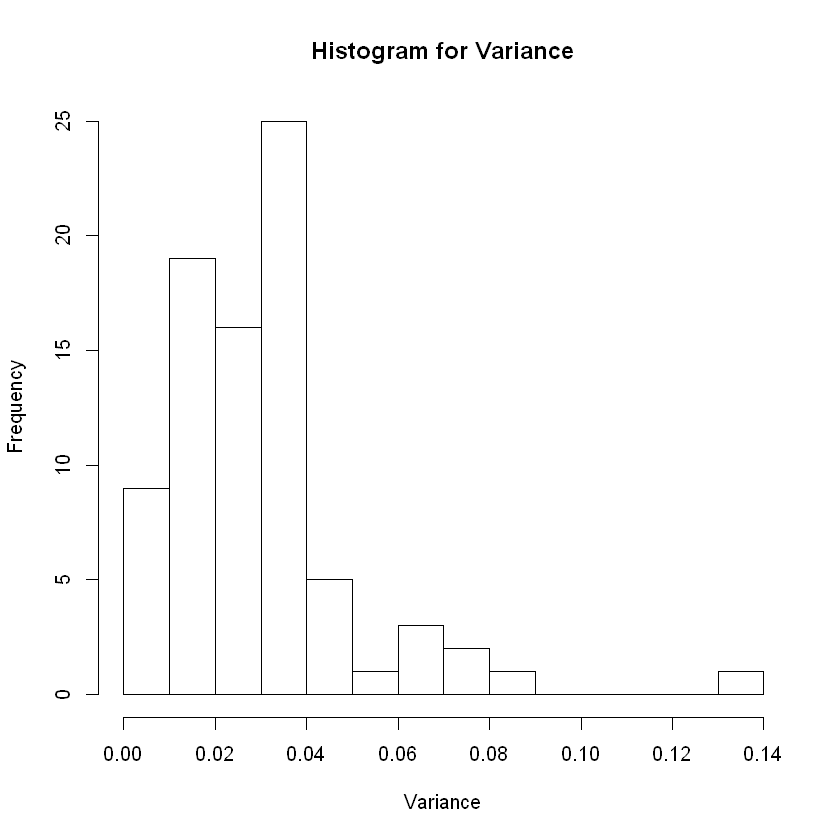

In [7]:
hist(apply(propertiesdfnorm, 2, var),main="Histogram for Variance", 
     xlab="Variance", 
     border="black", 
     col="white", 
     breaks=10)

In [8]:
variancedf=apply(propertiesdfnorm, 2, var)
featuresToKeep <- data.frame(variancedf[which(variancedf >= 0.025)])
featuresToKeep <- featuresToKeep %>% rownames_to_column("feature")
featuresToKeep$feature

[1] "number_of_elements"              "wtd_mean_atomic_mass"           
 [3] "wtd_gmean_atomic_mass"           "entropy_atomic_mass"            
 [5] "wtd_entropy_atomic_mass"         "range_atomic_mass"              
 [7] "std_atomic_mass"                 "wtd_std_atomic_mass"            
 [9] "entropy_fie"                     "wtd_entropy_fie"                
[11] "range_fie"                       "wtd_range_fie"                  
[13] "std_fie"                         "wtd_std_fie"                    
[15] "entropy_atomic_radius"           "wtd_entropy_atomic_radius"      
[17] "range_atomic_radius"             "std_atomic_radius"              
[19] "wtd_std_atomic_radius"           "gmean_Density"                  
[21] "wtd_gmean_Density"               "entropy_Density"                
[23] "wtd_entropy_Density"             "range_Density"                  
[25] "entropy_ElectronAffinity"        "wtd_entropy_ElectronAffinity"   
[27] "range_ElectronAffinity"          "entropy_FusionHeat"             
[29] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[31] "std_FusionHeat"                  "entropy_ThermalConductivity"    
[33] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[35] "std_ThermalConductivity"         "wtd_std_ThermalConductivity"    
[37] "mean_Valence"                    "wtd_mean_Valence"               
[39] "gmean_Valence"                   "wtd_gmean_Valence"              
[41] "entropy_Valence"                 "wtd_entropy_Valence"            
[43] "range_Valence"                   "std_Valence"                    
[45] "critical_temp"

So these are the features that we are going to retain in the dataset for training the model.

In [9]:
propertiesdf<-propertiesdf[,c(featuresToKeep$feature)]
dim(propertiesdf)

[1] 21263    45

Our features have decreased the training features from 81 to 45 after removing the features with low variance

#### Correlation

#####  What is correlation coefficient? 

![](http://www.uow.edu.au/content/groups/public/@web/@stsv/documents/mm/uow153493.gif)

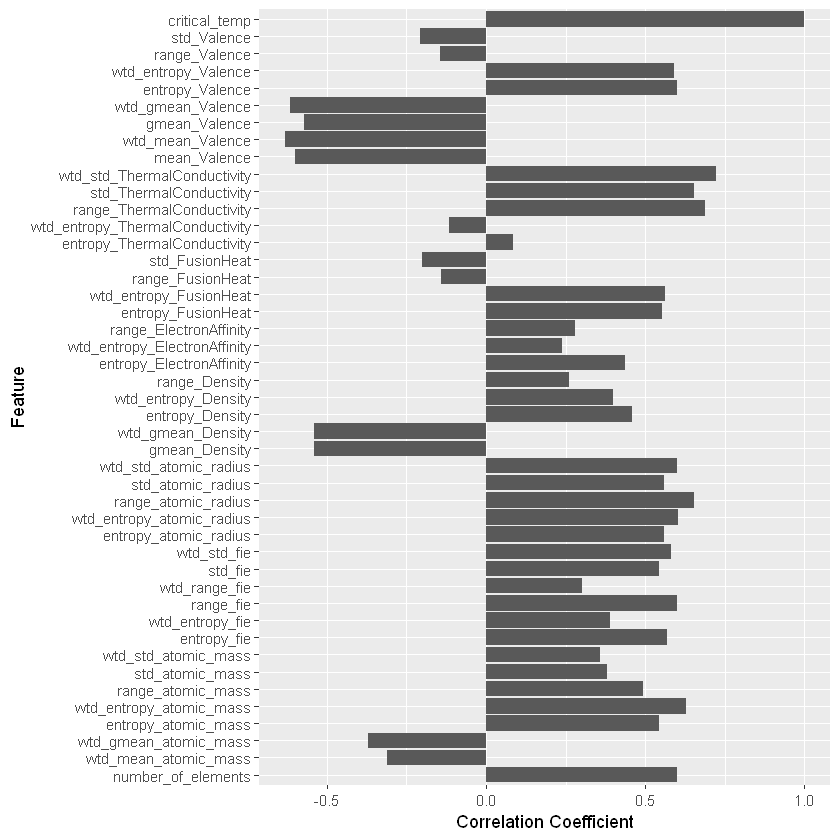

In [10]:
crictical_temp <- propertiesdf$critical_temp
features <- propertiesdf[-82]

correlationdf <- data.frame(matrix(ncol = 0, nrow = length(features)))
correlationdf$Feature=names(features)

for (index in 1:length(names(features))){
    correlationdf$coef[index] <- cor(features[, index], crictical_temp)
}
ggplot(correlationdf, aes(x = factor(Feature, levels = Feature), y = coef)) + 
    geom_bar(stat = "identity") + 
    coord_flip() +
    xlab("Feature") + 
    ylab("Correlation Coefficient")

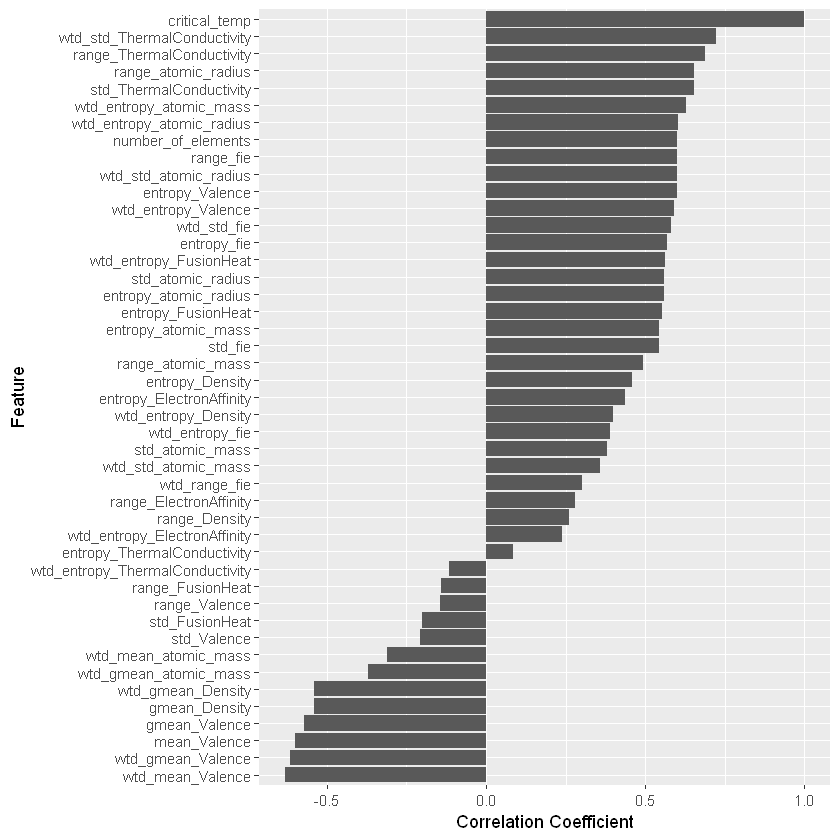

In [11]:
correlationdfSorted <- correlationdf[order(correlationdf$coef), ]
ggplot(correlationdfSorted, aes(x = factor(Feature, levels = Feature), y = coef)) + 
    geom_bar(stat = "identity") + 
    coord_flip() +
    xlab("Feature") + 
    ylab("Correlation Coefficient")

Now let's eliminate the features which have a correlation less than 0.5 as an absloute value. The Features which have correlation greater than 0.5 are :

In [12]:
filteredFeatures <- subset(correlationdf, abs(coef) > 0.5)
filteredFeatures$Feature

[1] "number_of_elements"          "entropy_atomic_mass"        
 [3] "wtd_entropy_atomic_mass"     "entropy_fie"                
 [5] "range_fie"                   "std_fie"                    
 [7] "wtd_std_fie"                 "entropy_atomic_radius"      
 [9] "wtd_entropy_atomic_radius"   "range_atomic_radius"        
[11] "std_atomic_radius"           "wtd_std_atomic_radius"      
[13] "gmean_Density"               "wtd_gmean_Density"          
[15] "entropy_FusionHeat"          "wtd_entropy_FusionHeat"     
[17] "range_ThermalConductivity"   "std_ThermalConductivity"    
[19] "wtd_std_ThermalConductivity" "mean_Valence"               
[21] "wtd_mean_Valence"            "gmean_Valence"              
[23] "wtd_gmean_Valence"           "entropy_Valence"            
[25] "wtd_entropy_Valence"         "critical_temp"

In [13]:
propertiesdf <- subset(propertiesdf, select = c(filteredFeatures$Feature))
dim(propertiesdf)

[1] 21263    26

Now we have 25 features in the train set.

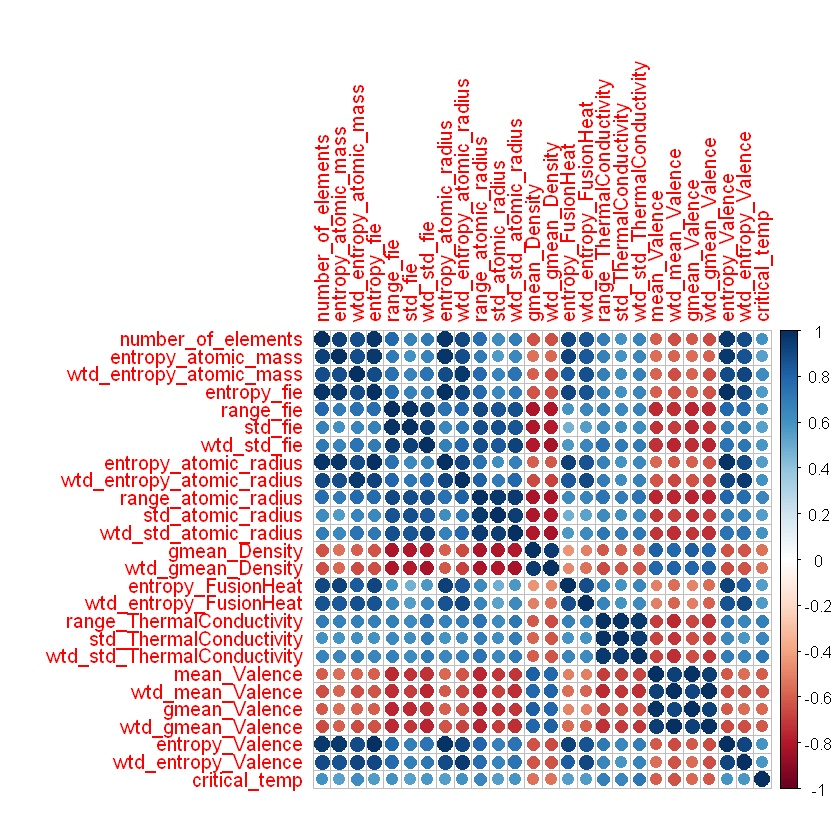

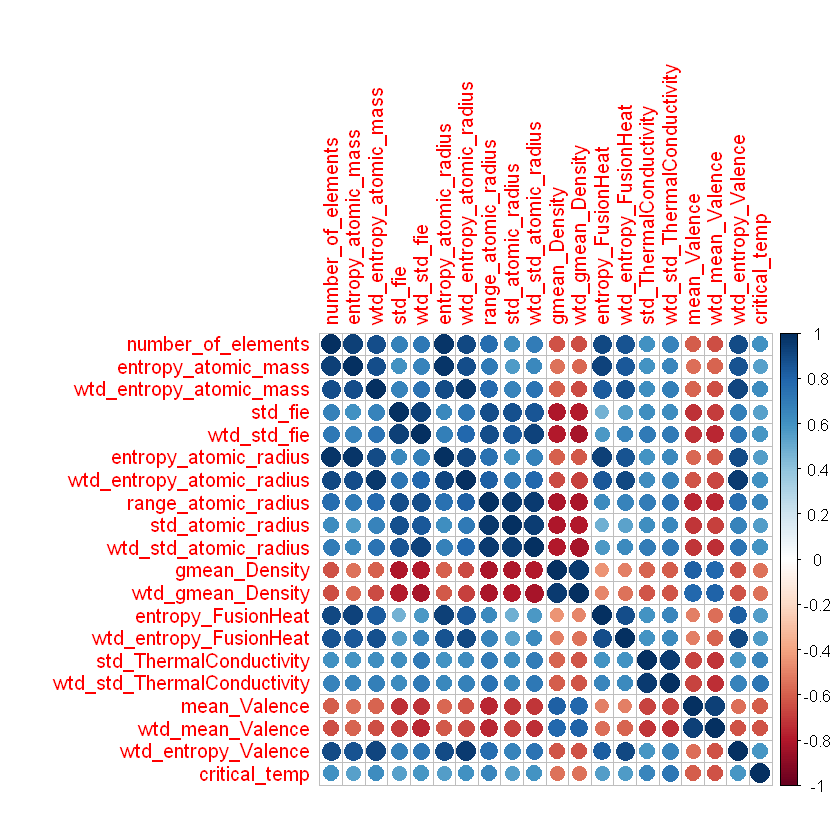

In [14]:
corrplot(cor(propertiesdf))
indexesToDrop <- findCorrelation(cor(propertiesdf), cutoff = 0.98)
corrplot(cor(propertiesdf[,-indexesToDrop]))
propertiesdf<-propertiesdf[,-indexesToDrop]

In [15]:
dim(propertiesdf)

[1] 21263    20

Now we are left with 19 features from our orignal dataset of 81 features. And the features are :

In [16]:
names(propertiesdf[-20])

[1] "number_of_elements"          "entropy_atomic_mass"        
 [3] "wtd_entropy_atomic_mass"     "std_fie"                    
 [5] "wtd_std_fie"                 "entropy_atomic_radius"      
 [7] "wtd_entropy_atomic_radius"   "range_atomic_radius"        
 [9] "std_atomic_radius"           "wtd_std_atomic_radius"      
[11] "gmean_Density"               "wtd_gmean_Density"          
[13] "entropy_FusionHeat"          "wtd_entropy_FusionHeat"     
[15] "std_ThermalConductivity"     "wtd_std_ThermalConductivity"
[17] "mean_Valence"                "wtd_mean_Valence"           
[19] "wtd_entropy_Valence"

### 3. Model Development<a class="anchor" id="sec_3"></a>

#### Prepare the Data Frame

In [17]:
set.seed(123) 
sample = sample.split(propertiesdf, SplitRatio = .75)
propertiesdftrain = subset(propertiesdf, sample == TRUE)
propertiesdftest  = subset(propertiesdf, sample == FALSE)

#### Define some Functions
These functions are used during the model building to evaluate the model accuracy. 

#### Function to Calculate Model Accuracy Statistics

Name: Model.Accuracy

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 
- df - the degrees of freedom
- p - the number of parameters excluding the coefficient

Return Value:

A list containing:
- rsquared - the R-Squared value calculated from the predicted and target values
- rse - the residual standard error
- f.stat - the F-statistic

Description:

Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the statistics according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- Residual standard error - $\sqrt{\frac{1}{df}RSS}$
- F-statistics - $\frac{(TSS - RSS)/p}{RSS / df}$

In [18]:
Model.Accuracy <- function(predicted, target, df, p) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

#### Function to Calculate RMSE

Name: RMSE

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 

Return Value:

The RMSE value calculated from the predicted and target values

Description:

Calculate the RMSE value: $RMSE = \sqrt {\sum_{i=1}^n (\hat y_i - y_i)^2 / N}$

In [19]:
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

### Regression Model

Try fitting all variables to see what appears to be important

In [20]:
fit1 <- lm(critical_temp ~ ., data=propertiesdftrain)
summary(fit1)


Call:
lm(formula = critical_temp ~ ., data = propertiesdftrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.053 -13.121   0.216  12.914 174.144 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.638e+01  1.548e+00  17.038  < 2e-16 ***
number_of_elements           8.893e-01  6.372e-01   1.396 0.162832    
entropy_atomic_mass         -5.533e+01  2.437e+00 -22.700  < 2e-16 ***
wtd_entropy_atomic_mass      6.005e+01  1.972e+00  30.446  < 2e-16 ***
std_fie                      9.324e-02  8.520e-03  10.944  < 2e-16 ***
wtd_std_fie                 -1.022e-01  8.946e-03 -11.428  < 2e-16 ***
entropy_atomic_radius        1.505e+01  3.792e+00   3.969 7.26e-05 ***
wtd_entropy_atomic_radius   -3.682e+01  2.816e+00 -13.079  < 2e-16 ***
range_atomic_radius          5.975e-01  2.135e-02  27.992  < 2e-16 ***
std_atomic_radius           -1.565e+00  5.807e-02 -26.956  < 2e-16 ***
wtd_std_atomic_radius        3.663e-01  4.476

The adjusted R-squared ($R^2$) value indicates this model explains 73.79% of the variation in Critical temperatures.

The F-statistic 1468 has a p-value < 2.2e-16 - so reject the null hypothesis (the model explains nothing) - the model is useful

The p-values for the coefficients show most of the variables are significant at the 0.05 level.

Check the residuals using the plot function

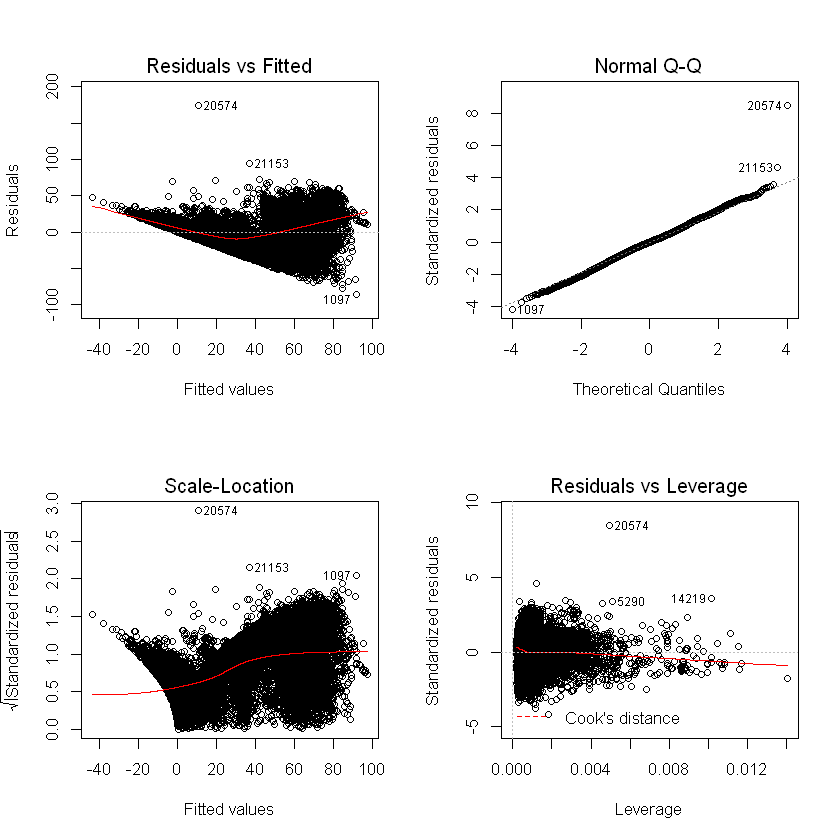

In [21]:
par(mfrow=c(2,2))
plot(fit1)

The model plots show:
- Residual vs Fitted - shows the residuals reasonably evenly distributed around zero, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- Normal Q-Q - the residuals deviate significantly from the dashed line, indicating the residuals are not normally distributed
- Scale-Location - The chart shows the model violates the assumption of equal variance
- Residuals vs Leverage - The chart shows there are no influential outliers.

Using step to remove unimportant variables

In [22]:
step(fit1)

Start:  AIC=96576.29
critical_temp ~ number_of_elements + entropy_atomic_mass + wtd_entropy_atomic_mass + 
    std_fie + wtd_std_fie + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    gmean_Density + wtd_gmean_Density + entropy_FusionHeat + 
    wtd_entropy_FusionHeat + std_ThermalConductivity + wtd_std_ThermalConductivity + 
    mean_Valence + wtd_mean_Valence + wtd_entropy_Valence

                              Df Sum of Sq     RSS   AIC
- number_of_elements           1       830 6786201 96576
<none>                                     6785371 96576
- wtd_mean_Valence             1      1256 6786627 96577
- mean_Valence                 1      5256 6790628 96587
- entropy_atomic_radius        1      6710 6792081 96590
- entropy_FusionHeat           1      6895 6792266 96590
- wtd_std_atomic_radius        1     28531 6813902 96641
- wtd_entropy_Valence          1     31439 6816811 96648
- wtd_entropy_FusionH


Call:
lm(formula = critical_temp ~ entropy_atomic_mass + wtd_entropy_atomic_mass + 
    std_fie + wtd_std_fie + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    gmean_Density + wtd_gmean_Density + entropy_FusionHeat + 
    wtd_entropy_FusionHeat + std_ThermalConductivity + wtd_std_ThermalConductivity + 
    mean_Valence + wtd_mean_Valence + wtd_entropy_Valence, data = propertiesdftrain)

Coefficients:
                (Intercept)          entropy_atomic_mass  
                  26.546487                   -55.941298  
    wtd_entropy_atomic_mass                      std_fie  
                  60.213381                     0.093908  
                wtd_std_fie        entropy_atomic_radius  
                  -0.101650                    18.463602  
  wtd_entropy_atomic_radius          range_atomic_radius  
                 -37.100352                     0.610660  
          std_atomic_radius        wtd_std_

From the above statistics we can observe that our features from both general linear regression model and step wise regression model explains minor part of the data.

The AIC value for all the step models is far greater than zero as well, so none of them are better fit.

But the Residual Standard error is high which tells us that when we predict wrong we are off from the truth value by a lot.
From this we can conclude that Linear regression can not yeild us the results we want.

### RandomForest

In [23]:
randomforestfit <- randomForest(critical_temp ~ ., data = propertiesdftrain, importance = TRUE)
randomforestfit


Call:
 randomForest(formula = critical_temp ~ ., data = propertiesdftrain,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 93.65305
                    % Var explained: 92

In [35]:
prediction <-predict(randomforestfit, propertiesdftest[-20])

In [107]:
rmse<-sqrt(randomforestfit$mse[which.min(randomforestfit$mse)])
cat('The root mean square error of the test data is ', round(rmse,3),'\n')

The root mean square error of the test data is  9.677 


In [105]:
prediction

5            8           11           16           20           25 
 13.90766770  27.73693089  13.82976044  33.43802580   9.12890624  26.34800755 
          28           31           36           40           45           48 
 26.07682235  46.14491722  87.65999114  87.94186020  74.69429371  69.67124920 
          51           56           60           65           68           71 
 85.84384527  83.21570773  27.82922467  74.17969319  22.71258085  26.38206667 
          76           80           85           88           91           96 
 10.12775687  25.50959127  81.64733251  74.36010057  85.40107871  85.40107871 
         100          105          108          111          116          120 
 85.40107871  60.57346002  72.39469571  44.04421354  89.73369139  83.61793844 
         125          128          131          136          140          145 
 35.46168654  74.40993940  55.26310983  90.91647065  88.52497396  62.72346966 
         148          151          156          160          165          168 
 68.16767766  35.46168654  64.40334100  62.52665226  61.06038709  85.40107871 
         171          176          180          185          188          191 
 74.29253390  86.66801140  83.21570773  83.21570773  30.72783500 106.58383725 
         196          200          205          208          211          216 
 80.80134183  87.81882333  85.40107871  73.62557829  60.50564233  59.26070499 
         220          225          228          231          236          240 
 64.30518819  30.13874533  38.49852185  91.44862159  77.67294833  87.81882333 
         245          248          251          256          260          265 
 85.59844996  87.81882333  64.43069010  86.69170200  78.09057767  66.86479190 
         268          271          276          280          285          288 
 26.56980167  91.60162638  74.47058228  89.32244185  78.91566038  61.46575745 
         291          296          300          305          308          311 
 70.46056746  56.06217939  84.48988543  90.43931953  92.17276929  90.55629112 
         316          320          325          328          331          336 
 81.55650072  72.23117323  80.27205202  78.49024440  74.44177013  50.84897713 
         340          345          348          351          356          360 
 89.73369139  45.98733810  42.61168289  65.56898109  66.07813273  91.93300933 
         365          368          371          376          380          385 
 89.65503533  58.47571078  91.44862159  83.21570773  71.90151400  79.63228635 
         388          391          396          400          405          408 
 65.26323869  77.89597490  22.72952417  29.82180846  47.68219906  86.33562248 
         411          416          420          425          428          431 
 85.64269981  30.38909132  29.20789260  80.27205202  73.09657713  88.20275360 
         436          440          445          448          451          456 
 86.58502583  91.18982122  22.13090425  91.31817402  76.62542683  33.37276506 
         460          465          468          471          476          480 
 90.93164910  18.87667533 105.92356146  85.40107871  62.81367419  57.60876142 
         485          488          491          496          500          505 
 60.93948314  63.72823500  40.22752460  85.15353710  90.35928334  91.44862159 
         508          511          516          520          525          528 
 67.16359133  78.47408767  77.19946433  69.09850548  63.92722158  27.73693089 
         531          536          540          545          548          551 
 13.82976044  92.82997790  69.82875354  83.37401783  68.39253500  79.76046842 
         556          560          565          568          571          576 
 20.72345867  41.40757950  51.63687333  42.67220247  38.76835333  46.18593571 
         580          585          588          591          596          600 
 90.35537826  91.44862159  71.17773933  48.12509105  80.47595433  41.93681810 
         605          608          611          616          

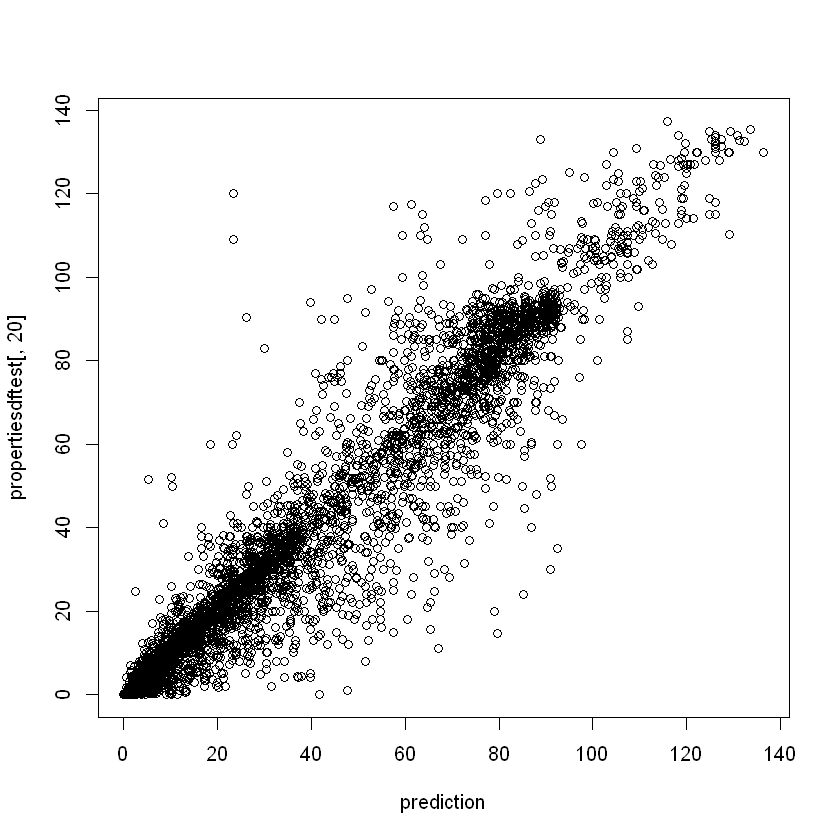

In [45]:
plot(prediction,propertiesdftest[,20])

From the above plot we can observe that our model can predict accurately.

### XGBoost

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library.XGBoost belongs to a family of boosting algorithms that convert weak learners into strong learners. A weak learner is one which is slightly better than random guessing.
Boosting is a sequential process; i.e., trees are grown using the information from a previously grown tree one after the other. This process slowly learns from data and tries to improve its prediction in subsequent iterations.we have two methods: booster = gbtree and booster = gblinear. In gblinear, it builds generalized linear model and optimizes it using regularization (L1,L2) and gradient descent. In this, the subsequent models are built on residuals (actual - predicted) generated by previous iterations.

In [64]:
trainTrain <- propertiesdftrain[-20]
trainTarget <- propertiesdftrain$critical_temp

xgb_trcontrol = trainControl(
  method = "cv",
  number = 10,  
  allowParallel = TRUE,
  verboseIter = FALSE,
  returnData = FALSE
)

set.seed(123) 
xgb_model = train(
  trainTrain, trainTarget,  
  trControl = xgb_trcontrol,
  method = "xgbTree"
)
xgb_model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
108,150,3,0.4,0,0.8,1,1


In [76]:
testTrain <- propertiesdftest[-20]
testTarget <- propertiesdftest$critical_temp

predicted = predict(xgb_model, testTrain)
residuals = testTrain - predicted
rms<-RMSE(predicted,testTarget)
cat('The root mean square error of the test data is ', round(rms,3),'\n')

The root mean square error of the test data is  11.467 


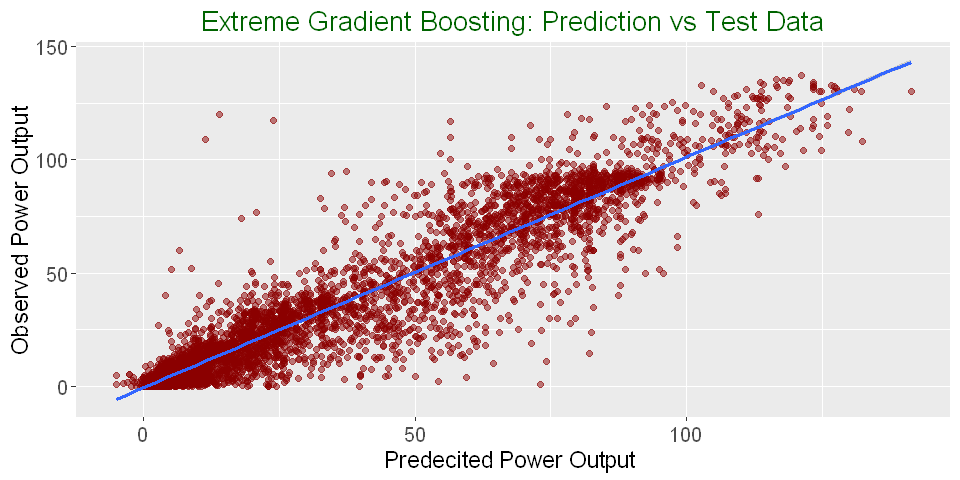

In [80]:
options(repr.plot.width=8, repr.plot.height=4)
my_data = as.data.frame(cbind(predicted = predicted,
                            observed = testTarget))
# Plot predictions vs test data
ggplot(my_data,aes(predicted, observed)) + geom_point(color = "darkred", alpha = 0.5) + 
    geom_smooth(method=lm)+ ggtitle('Linear Regression ') + ggtitle("Extreme Gradient Boosting: Prediction vs Test Data") +
      xlab("Predecited Power Output ") + ylab("Observed Power Output") + 
        theme(plot.title = element_text(color="darkgreen",size=16,hjust = 0.5),
         axis.text.y = element_text(size=12), axis.text.x = element_text(size=12,hjust=.5),
         axis.title.x = element_text(size=14), axis.title.y = element_text(size=14))

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

From the 3 models we can use the linear regression model can be used as base model. From the XGBoost model and Random forest model we can pbserve that XGBoost model performs well than the Random forest model on the basis of RMSE and R2 Variance explained by both the models.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

The following variables are being considered as the features that explains the target most as these have correlation with the target and also variance is considerable in the data. We can see further analysis in the EDA part of the assignmnet as mentioned above.

In [108]:
names(propertiesdf[-20])

[1] "number_of_elements"          "entropy_atomic_mass"        
 [3] "wtd_entropy_atomic_mass"     "std_fie"                    
 [5] "wtd_std_fie"                 "entropy_atomic_radius"      
 [7] "wtd_entropy_atomic_radius"   "range_atomic_radius"        
 [9] "std_atomic_radius"           "wtd_std_atomic_radius"      
[11] "gmean_Density"               "wtd_gmean_Density"          
[13] "entropy_FusionHeat"          "wtd_entropy_FusionHeat"     
[15] "std_ThermalConductivity"     "wtd_std_ThermalConductivity"
[17] "mean_Valence"                "wtd_mean_Valence"           
[19] "wtd_entropy_Valence"

## 6. Conclusion <a class="anchor" id="sec_6"></a>

We were sucessful in predicting the critical temperatures for the cleaned data that was provided. So we can say with fair bit of confidence that we can predict the crtitical temperatures for most elements or atleast narrow the range that needs to be examined.

## 7. References <a class="anchor" id="sec_7"></a>

https://arxiv.org/pdf/1803.10260.pdf


https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/


https://datascienceplus.com/random-forests-in-r/
